# Random Walk on a Ring with an Absorbing State

This notebook demonstrates how to construct a directed graph representing a random walk on a ring with an absorbing state. The notebook covers:

1. Creating the directed graph
2. Computing the transition probability matrix
3. Simulating the evolution of probabilities over time
4. Generating an animated visualization of the random walk

Follow along and execute the cells step by step to understand the process.

### Additional Code

This section performs auxiliary computations.

In [1]:
!pip install pillow
!pip install nbformat==5.10.4 nbconvert==6.5.4

### Additional Code

This section performs auxiliary computations.

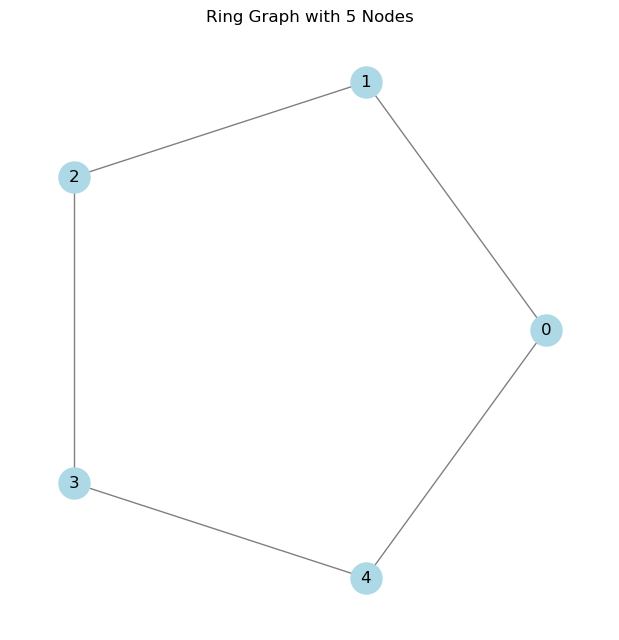

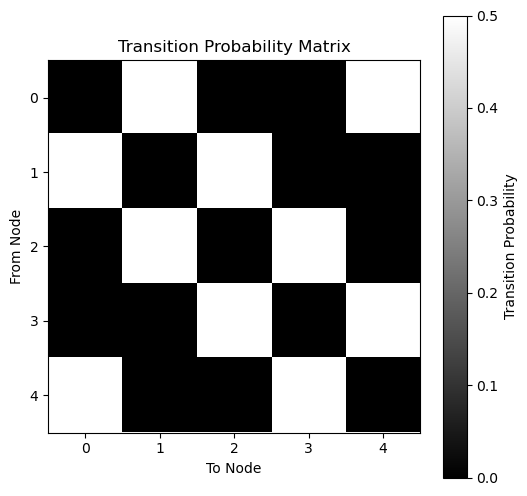

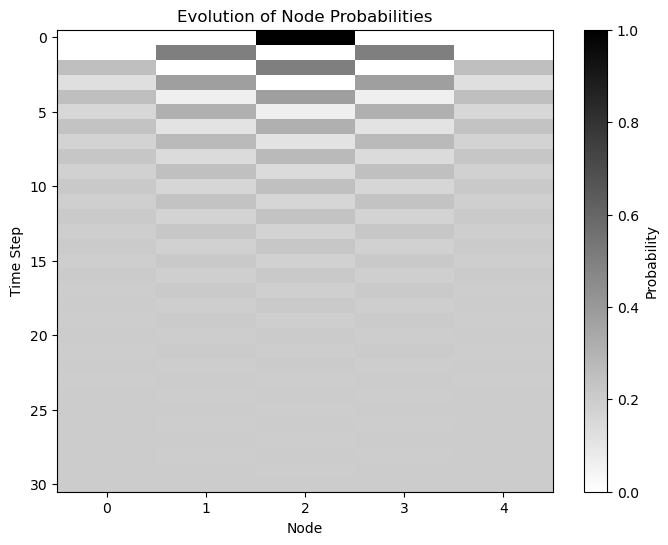

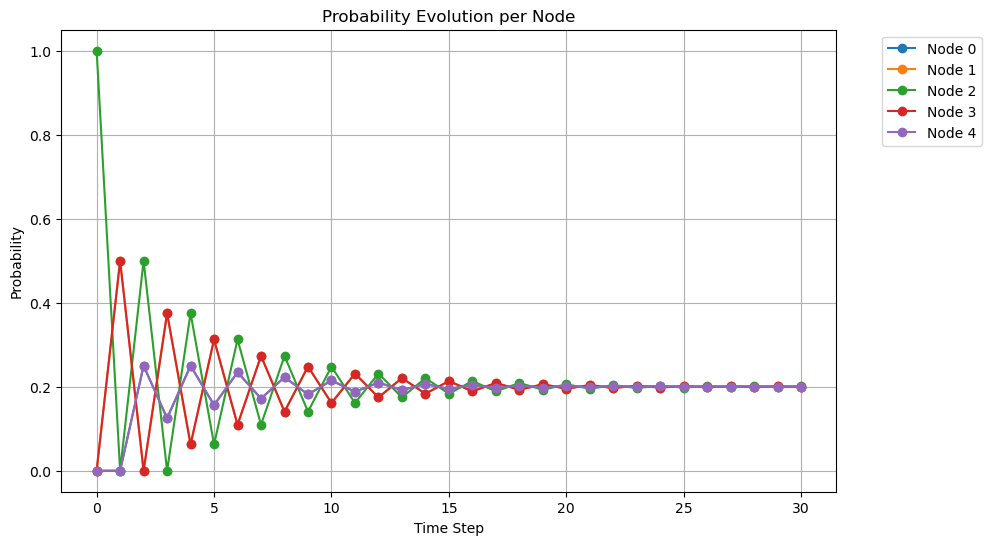

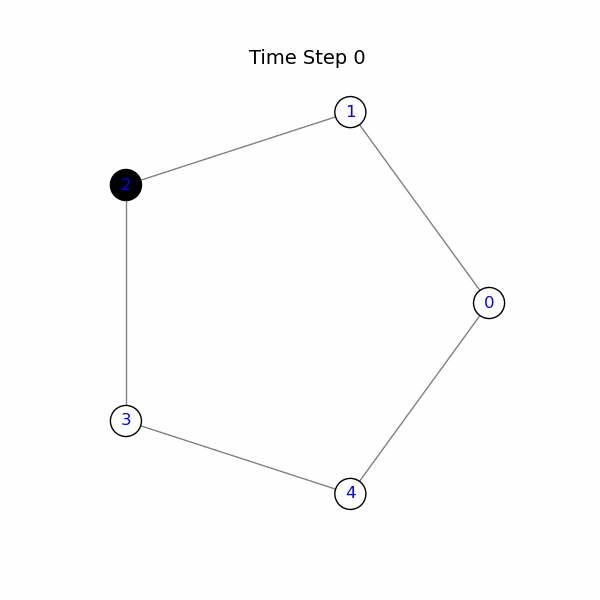

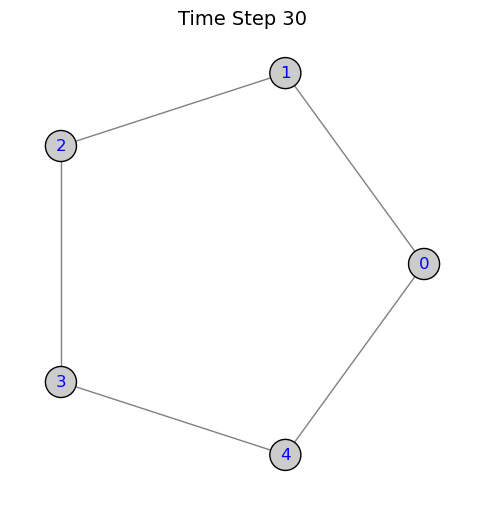

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import Image, display

# -------------------------------
# 1. Create the ring graph (cycle graph) with 5 nodes
# -------------------------------
n = 5  # number of nodes
G = nx.cycle_graph(n)  # creates a ring graph with nodes 0 to 4

# Use a circular layout to display the ring graph nicely
pos = nx.circular_layout(G)

# Plot the ring graph
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("Ring Graph with 5 Nodes")
plt.axis('equal')
plt.show()

# -------------------------------
# 2. (Removed: Random Walk on Ring Graph plot)
# -------------------------------
# (The code for simulating and plotting a random walk on the ring graph has been removed.)

# -------------------------------
# 3. Compute and plot the transition probability matrix
# -------------------------------
# In a ring graph with n > 2, each node has two neighbors.
P = np.zeros((n, n))
for i in range(n):
    neighbors = list(G.neighbors(i))
    degree = len(neighbors)
    for j in neighbors:
        P[i, j] = 1.0 / degree

# Plot the transition probability matrix using a grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(P, cmap='gray', interpolation='none')
plt.colorbar(label='Transition Probability')
plt.title("Transition Probability Matrix")
plt.xlabel("To Node")
plt.ylabel("From Node")
plt.show()

# -------------------------------
# 4. Visualize the evolution of node probabilities starting from the middle node
# -------------------------------
time_steps = 30  # number of time steps to evolve

# Create the initial probability distribution: one-hot at the "middle" node.
middle_node = n // 2  # For 5 nodes, this is node 2.
initial_dist = np.zeros(n)
initial_dist[middle_node] = 1.0

# Evolve the probability distribution over time using π_{t+1} = π_t P.
probs_over_time = [initial_dist.copy()]
current_dist = initial_dist.copy()
for t in range(time_steps):
    current_dist = current_dist @ P  # update distribution (row vector times P)
    probs_over_time.append(current_dist.copy())

probs_over_time = np.array(probs_over_time)  # shape: (time_steps+1, n)

# Plot the evolution as a heatmap using reversed grayscale (0: white, 1: black)
plt.figure(figsize=(8, 6))
plt.imshow(probs_over_time, cmap='gray_r', aspect='auto', vmin=0, vmax=1)
plt.colorbar(label='Probability')
plt.xlabel('Node')
plt.ylabel('Time Step')
plt.title('Evolution of Node Probabilities')
plt.xticks(range(n))
plt.yticks(range(0, time_steps+1, 5))
plt.show()

# Optionally, plot the evolution for each node as a line plot
plt.figure(figsize=(10, 6))
time_array = np.arange(time_steps + 1)
for node in range(n):
    plt.plot(time_array, probs_over_time[:, node], marker='o', label=f"Node {node}")
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.title('Probability Evolution per Node')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# -------------------------------
# 5. Create a GIF Animation of the Evolution of the Random Walk
# -------------------------------

# Set up the figure and axis for the animation
fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
ax.axis('off')

# Draw the graph edges (which remain constant)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray')

# Prepare node positions: extract x and y coordinates from pos (nodes sorted by label)
nodes = sorted(G.nodes())
x = [pos[node][0] for node in nodes]
y = [pos[node][1] for node in nodes]

# Create an initial scatter plot for the nodes, coloring them by the probability in the first frame.
# We use the reversed grayscale colormap ('gray_r') so that 0 maps to white and 1 to black.
scat = ax.scatter(x, y, s=500, c=probs_over_time[0], cmap='gray_r', vmin=0, vmax=1, edgecolors='black')

# Add node labels on top of the nodes
for node in nodes:
    ax.text(pos[node][0], pos[node][1], str(node),
            horizontalalignment='center', verticalalignment='center', color='blue', fontsize=12)

# Define an update function for the animation
def update(frame):
    current_probs = probs_over_time[frame]
    scat.set_array(current_probs)
    ax.set_title(f"Time Step {frame}", fontsize=14)
    return scat,

# Create the animation using FuncAnimation
ani = animation.FuncAnimation(fig, update, frames=len(probs_over_time), interval=300, blit=True)

# Save the animation as a GIF (this requires the Pillow writer)
ani.save('random_walk_evolution.gif', writer='pillow')

# -------------------------------
# 6. Display the Generated GIF in the Notebook
# -------------------------------
display(Image(filename='random_walk_evolution.gif'))

### Additional Code

This section performs auxiliary computations.

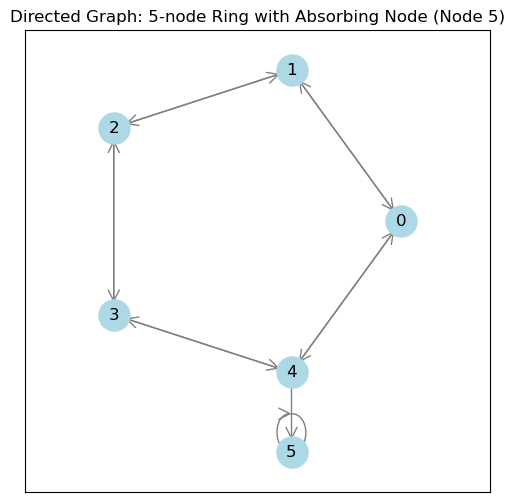

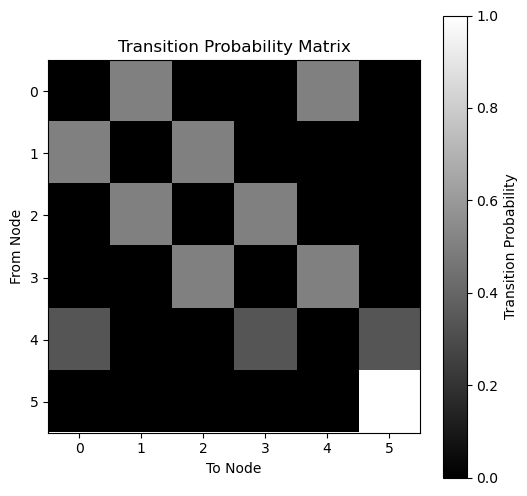

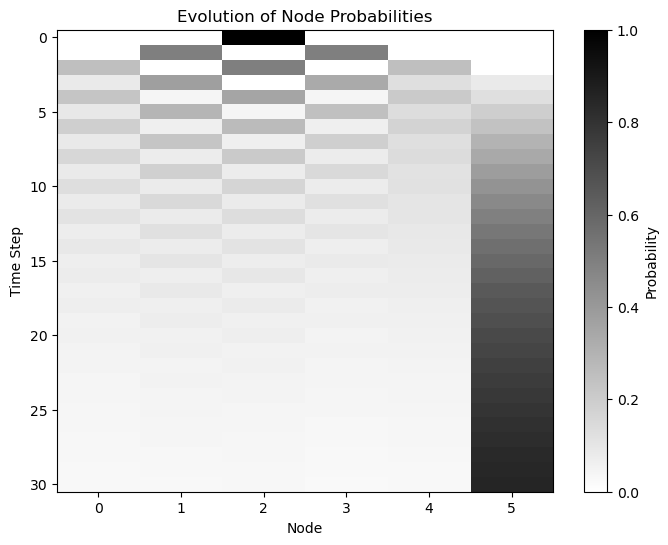

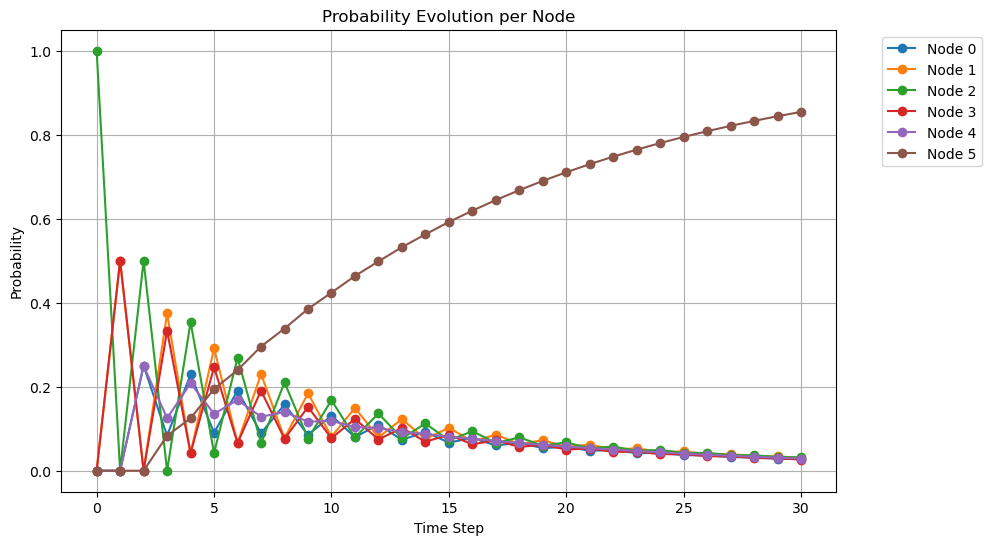

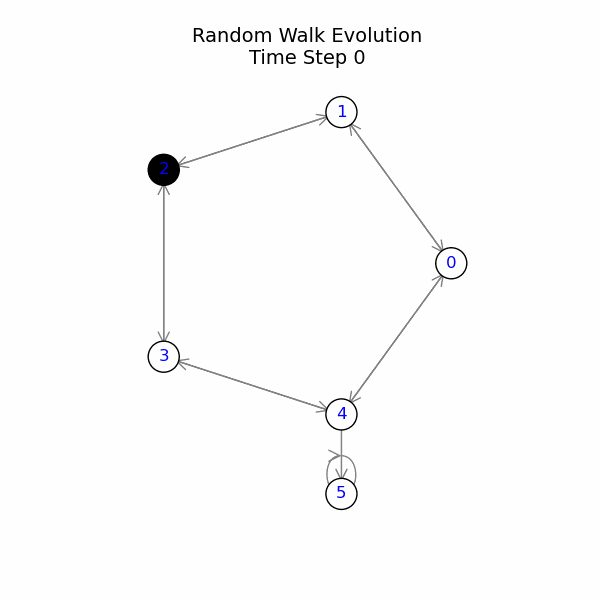

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import Image, display

# -------------------------------
# 1. Create the directed graph:
#    - A 5-node ring (cycle) on nodes 0-4 (bidirectional edges)
#    - An extra node (node 5) as an absorbing state.
#    - A directed edge from node 4 to node 5.
# -------------------------------
n_ring = 5          # ring nodes: 0 to 4
n_total = n_ring + 1  # total nodes: 6 (0-5)

# Create an undirected cycle graph for nodes 0-4
G_ring = nx.cycle_graph(n_ring)
# Convert to a directed graph: every undirected edge becomes two directed edges.
G = nx.DiGraph(G_ring)

# Add the extra absorbing node (node 5)
G.add_node(5)

# Add a directed edge from node 4 to node 5
G.add_edge(4, 5)
# Add a self-loop at node 5 to make it absorbing
G.add_edge(5, 5)

# -------------------------------
# 2. Define positions for plotting the graph
#    Use a circular layout for the ring nodes and place node 5 separately.
# -------------------------------
pos_ring = nx.circular_layout(G_ring)  # positions for nodes 0-4
pos = pos_ring.copy()
# Place node 5 slightly below node 4's position.
pos[5] = pos[4] + np.array([0, -0.5])

# Plot the directed graph
plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
plt.title("Directed Graph: 5-node Ring with Absorbing Node (Node 5)")
plt.axis('equal')
plt.show()

# -------------------------------
# 3. Compute and plot the transition probability matrix
# -------------------------------
# For a directed graph, use the out-neighbors of each node.
P = np.zeros((n_total, n_total))
for i in range(n_total):
    out_neighbors = list(G.successors(i))
    degree = len(out_neighbors)
    if degree > 0:
        for j in out_neighbors:
            P[i, j] = 1.0 / degree

# Plot the transition probability matrix using a grayscale image.
plt.figure(figsize=(6, 6))
plt.imshow(P, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.colorbar(label='Transition Probability')
plt.title("Transition Probability Matrix")
plt.xlabel("To Node")
plt.ylabel("From Node")
plt.show()

# -------------------------------
# 4. Simulate the evolution of node probabilities
#    starting from the middle node of the ring (node 2).
# -------------------------------
time_steps = 30  # number of time steps for the evolution

# For 6 total nodes (0-5), use node 2 (middle of the original ring) as the starting point.
initial_dist = np.zeros(n_total)
initial_dist[2] = 1.0

# Evolve the probability distribution over time: π_{t+1} = π_t P.
probs_over_time = [initial_dist.copy()]
current_dist = initial_dist.copy()
for t in range(time_steps):
    current_dist = current_dist @ P
    probs_over_time.append(current_dist.copy())

probs_over_time = np.array(probs_over_time)  # shape: (time_steps+1, n_total)

# Plot the evolution as a heatmap using reversed grayscale (0: white, 1: black)
plt.figure(figsize=(8, 6))
plt.imshow(probs_over_time, cmap='gray_r', aspect='auto', vmin=0, vmax=1)
plt.colorbar(label='Probability')
plt.xlabel('Node')
plt.ylabel('Time Step')
plt.title('Evolution of Node Probabilities')
plt.xticks(range(n_total))
plt.yticks(range(0, time_steps+1, 5))
plt.show()

# Optionally, plot the evolution for each node as a line plot
plt.figure(figsize=(10, 6))
time_array = np.arange(time_steps + 1)
for node in range(n_total):
    plt.plot(time_array, probs_over_time[:, node], marker='o', label=f"Node {node}")
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.title('Probability Evolution per Node')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# -------------------------------
# 5. Create and save the GIF animation of the evolution
# -------------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('equal')
ax.axis('off')

# Draw the graph edges once (they remain constant)
nx.draw_networkx_edges(G, pos, ax=ax, arrowstyle='->', arrowsize=20, edge_color='gray')

# Prepare node positions in a consistent order
nodes = sorted(G.nodes())
node_x = [pos[node][0] for node in nodes]
node_y = [pos[node][1] for node in nodes]

# Create an initial scatter plot for nodes, with colors determined by the initial probability vector.
scat = ax.scatter(node_x, node_y, s=500, c=probs_over_time[0],
                  cmap='gray_r', vmin=0, vmax=1, edgecolors='black')

# Add labels for nodes
for node in nodes:
    ax.text(pos[node][0], pos[node][1], str(node),
            horizontalalignment='center', verticalalignment='center',
            color='blue', fontsize=12)

def update(frame):
    """Update function for animation: change node colors according to the current probabilities."""
    current_probs = probs_over_time[frame]
    scat.set_array(current_probs)
    ax.set_title(f"Random Walk Evolution\nTime Step {frame}", fontsize=14)
    return scat,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(probs_over_time),
                              interval=300, blit=True)

# Save the animation as a GIF file (requires Pillow)
gif_filename = 'random_walk_evolution.gif'
ani.save(gif_filename, writer='pillow')

plt.close(fig)  # Close the figure so it doesn't display an extra static image

# -------------------------------
# 6. Display the GIF in the notebook
# -------------------------------
display(Image(filename=gif_filename))

### Additional Code

This section performs auxiliary computations.

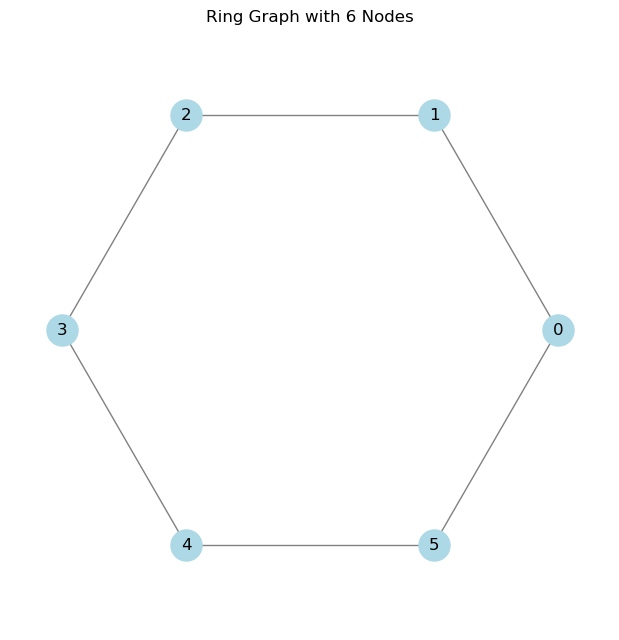

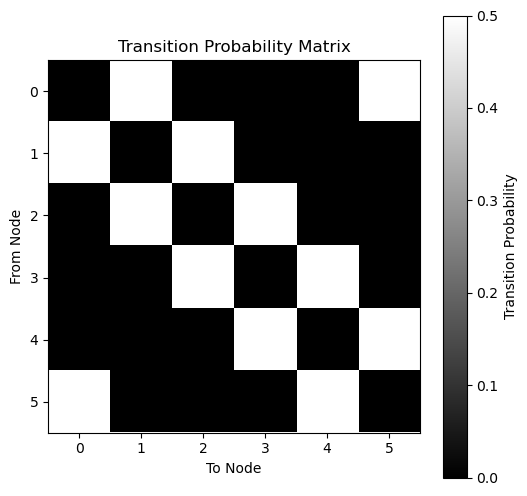

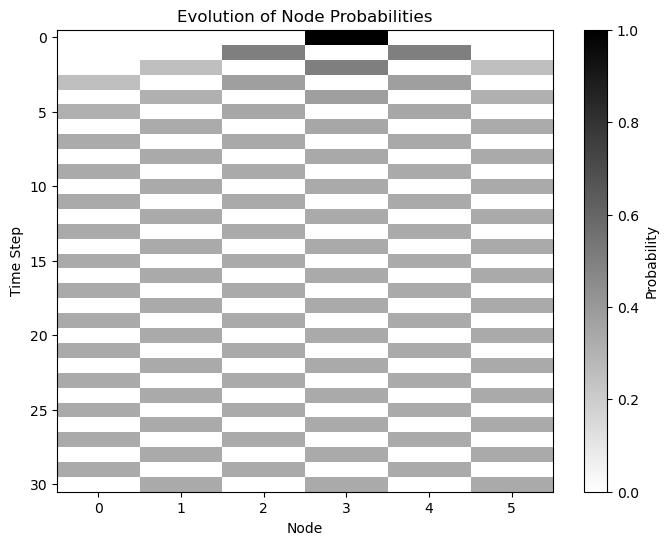

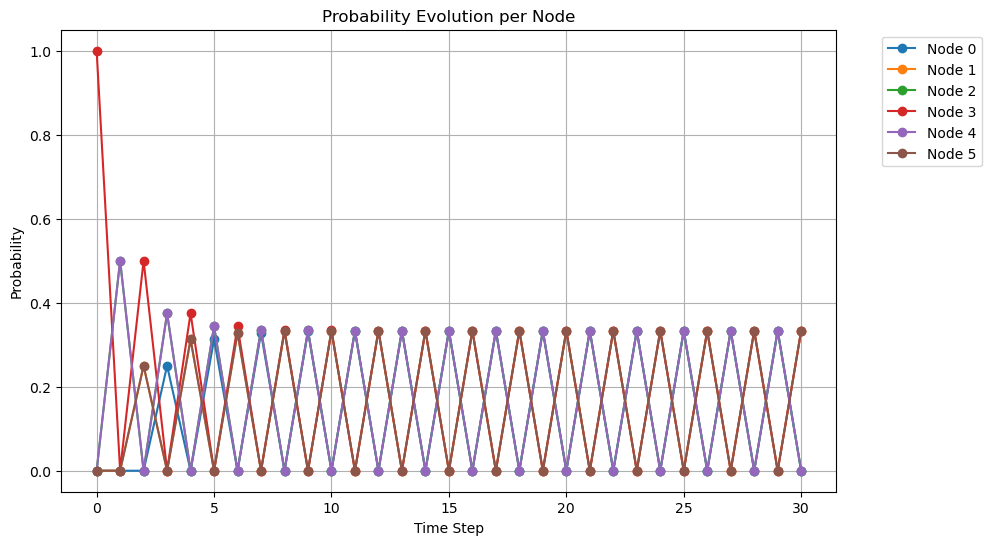

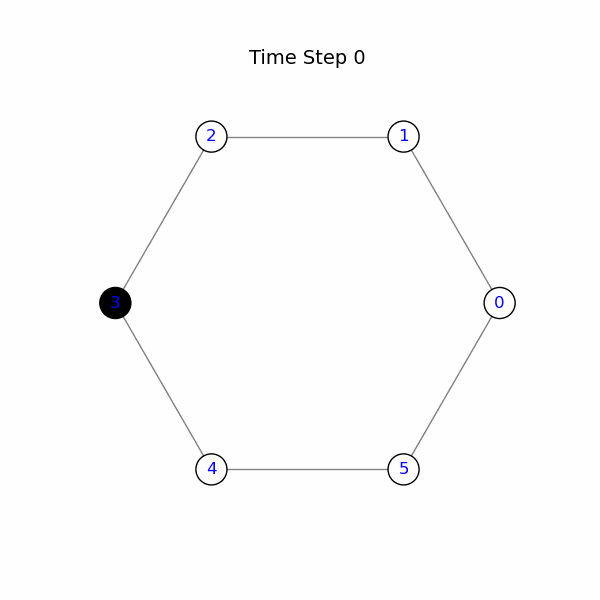

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import Image, display

# -------------------------------
# 1. Create the ring graph (cycle graph) with 6 nodes
# -------------------------------
n = 6  # number of nodes
G = nx.cycle_graph(n)  # creates a ring graph with nodes 0 to 5

# Use a circular layout to display the ring graph nicely
pos = nx.circular_layout(G)

# Plot the ring graph
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("Ring Graph with 6 Nodes")
plt.axis('equal')
plt.show()

# -------------------------------
# 2. (Removed: Random Walk on Ring Graph plot)
# -------------------------------
# The code for simulating and plotting a random walk on the ring graph has been removed.

# -------------------------------
# 3. Compute and plot the transition probability matrix
# -------------------------------
# In a ring graph with n > 2, each node has two neighbors.
P = np.zeros((n, n))
for i in range(n):
    neighbors = list(G.neighbors(i))
    degree = len(neighbors)
    for j in neighbors:
        P[i, j] = 1.0 / degree

# Plot the transition probability matrix using a grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(P, cmap='gray', interpolation='none')
plt.colorbar(label='Transition Probability')
plt.title("Transition Probability Matrix")
plt.xlabel("To Node")
plt.ylabel("From Node")
plt.show()

# -------------------------------
# 4. Visualize the evolution of node probabilities starting from the middle node
# -------------------------------
time_steps = 30  # number of time steps to evolve

# Create the initial probability distribution: one-hot at the "middle" node.
middle_node = n // 2  # For 6 nodes, this is node 3.
initial_dist = np.zeros(n)
initial_dist[middle_node] = 1.0

# Evolve the probability distribution over time using π_{t+1} = π_t P.
probs_over_time = [initial_dist.copy()]
current_dist = initial_dist.copy()
for t in range(time_steps):
    current_dist = current_dist @ P  # update distribution (row vector times P)
    probs_over_time.append(current_dist.copy())

probs_over_time = np.array(probs_over_time)  # shape: (time_steps+1, n)

# Plot the evolution as a heatmap using reversed grayscale (0: white, 1: black)
plt.figure(figsize=(8, 6))
plt.imshow(probs_over_time, cmap='gray_r', aspect='auto', vmin=0, vmax=1)
plt.colorbar(label='Probability')
plt.xlabel('Node')
plt.ylabel('Time Step')
plt.title('Evolution of Node Probabilities')
plt.xticks(range(n))
plt.yticks(range(0, time_steps+1, 5))
plt.show()

# Optionally, plot the evolution for each node as a line plot
plt.figure(figsize=(10, 6))
time_array = np.arange(time_steps + 1)
for node in range(n):
    plt.plot(time_array, probs_over_time[:, node], marker='o', label=f"Node {node}")
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.title('Probability Evolution per Node')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# -------------------------------
# 5. Create a GIF animation of the random walk evolution
# -------------------------------

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis('equal')
ax.axis('off')

# Draw the edges once (they remain constant)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray')

# Extract node positions in a sorted order
nodes = sorted(G.nodes())
x = [pos[node][0] for node in nodes]
y = [pos[node][1] for node in nodes]

# Initial node colors (using the first probability distribution)
scat = ax.scatter(x, y, s=500, c=probs_over_time[0], cmap='gray_r', vmin=0, vmax=1, edgecolors='black')

# Add labels to the nodes
for node in nodes:
    ax.text(pos[node][0], pos[node][1], str(node), horizontalalignment='center', verticalalignment='center', color='blue', fontsize=12)

def update(frame):
    """Update function for animation: update node colors based on current probabilities."""
    current_probs = probs_over_time[frame]
    scat.set_array(current_probs)
    ax.set_title(f"Time Step {frame}", fontsize=14)
    return scat,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(probs_over_time), interval=300, blit=True)

# Save the animation as a GIF (ensure you have Pillow installed)
gif_filename = 'random_walk_evolution.gif'
ani.save(gif_filename, writer='pillow')

plt.close()  # Close the animation figure to avoid duplicate output

# -------------------------------
# 6. Display the GIF in the Notebook
# -------------------------------
display(Image(filename=gif_filename))

### Additional Code

This section performs auxiliary computations.